In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Task vs. Number of Epochs for ResNet18 vs. DNS rate

In [5]:
import os
log_file = f"{os.environ['HOME']}/notebooks/fss/scripts/logs/resnet18-dns-test-v1-dns_ratio-0.5-traning.log"
# reading the log from file started from specified line
start_line = 2981
logs_lines = []
with open(log_file, 'r') as f:
    logs_lines = f.readlines()[start_line:]

In [21]:
import re

tasks_top1_list = []
epoch_num_list = []

epoch_pattern = r"\[([0-9]+)\]"
top1_pattern = r"Acc@1 ([0-9]+\.[0-9]+)"

one_epoch_top1 = []
for line in logs_lines:
    epoch_list = re.findall(epoch_pattern, line)
    top1_list = re.findall(top1_pattern, line)
    if epoch_list is not None and len(epoch_list)>0:
        epoch_num = int(epoch_list[0])
        if epoch_num not in epoch_num_list:
            epoch_num_list.append(epoch_num)
            # 如果新一轮epoch，重新记录top1
            if len(one_epoch_top1)>0:
                tasks_top1_list.append(one_epoch_top1)
                one_epoch_top1 = []
    if top1_list is not None and len(top1_list)>0:
        top1 = float(top1_list[0])
        one_epoch_top1.append(top1)
if len(one_epoch_top1)>0:
    tasks_top1_list.append(one_epoch_top1)
    one_epoch_top1 = []

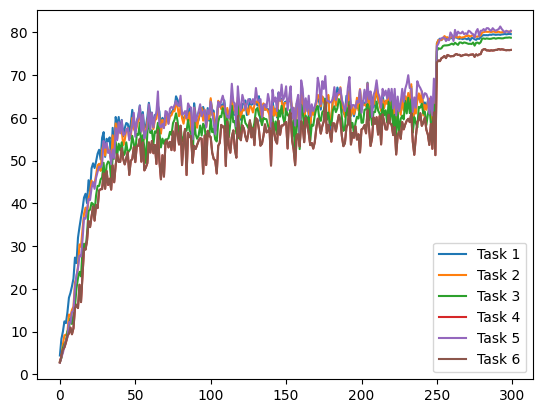

In [30]:
for i in range(6):
    plt.plot(epoch_num_list,[a[i] for a in tasks_top1_list],label=f"Task {i+1}")
    # plt.plot(epoch_num_list,[a[3] for a in tasks_top1_list],label="Task 4")
plt.legend()